In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/AMAL P/Downloads/TelcoChurn.csv")
data.head()    


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data_1 = data.copy()

In [5]:
data.shape

(7043, 21)

We have 7043 Rows and 21 Columns in this Telecom Dataset.
We have target Variable 'Churn' with object datatype, leading this to classification problem.
There is interesting entry here under object datatype which is 'TotalCharges'. This feature is numerical in nature but categories as Object datatypes. This implies that there is presence of string variable in this column or might be data error.

At end we have 3 Numerical variable and 18 categorical variable. Out of which 'CustomerID' is unnecessary variable from our analytical & modelling viewpoint. We will drop 'CustomerID' column.

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null values

In [7]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# 1. visualisation

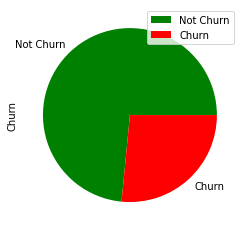

In [8]:
data['Churn'].value_counts().plot(kind='pie',labels=['Not Churn','Churn'],colors=['green','red'])
plt.legend() 

<AxesSubplot:ylabel='Churn'>

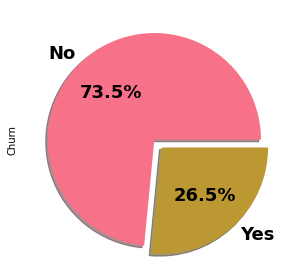

In [9]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

data['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18},shadow=True)

26.5 % Customer choose to churn service in last month. Which is quite high number.This all leads to imbalanced data case as churn is our target variable.

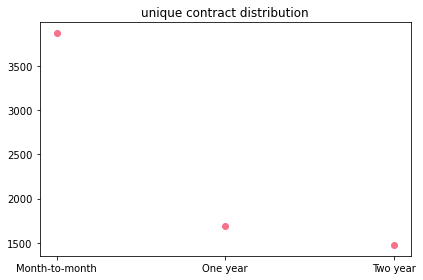

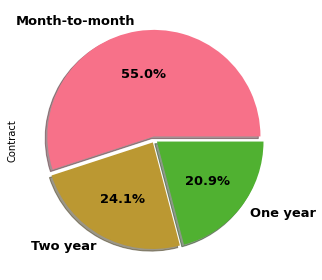

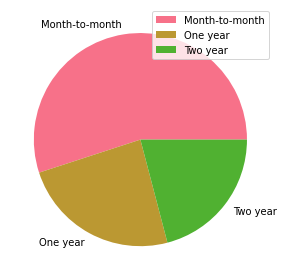

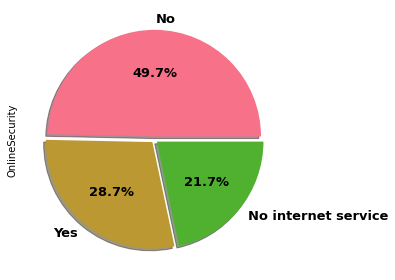

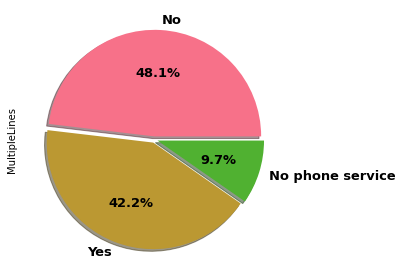

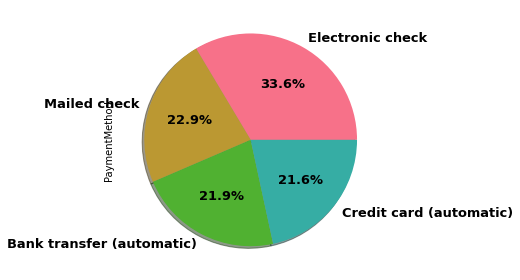

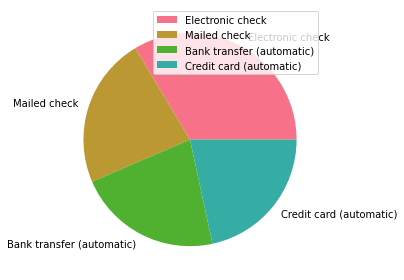

In [10]:
#univariate analysis

y=data.Contract.value_counts()
x=data['Contract'].unique()
plt.title('unique contract distribution')
plt.scatter(x, y)
plt.show()

data['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()

data1=data
plt.pie(y,labels=x)
plt.legend()

plt.show()

data['OnlineSecurity'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()



data['MultipleLines'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()


data['PaymentMethod'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.show()
plt.pie(data.PaymentMethod.value_counts(),labels=data['PaymentMethod'].unique())
plt.legend()
plt.show()




     

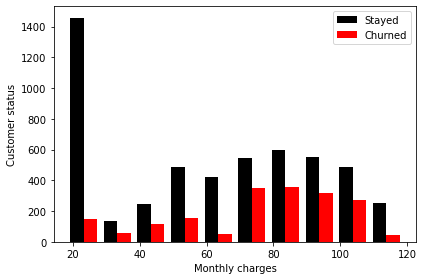

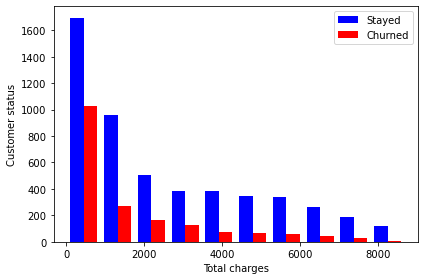

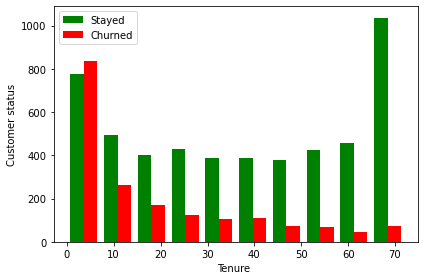

In [11]:
Customer_Stayed=data[data['Churn']=='No'].MonthlyCharges 
Customer_Churned=data[data['Churn']=='Yes'].MonthlyCharges 

plt.xlabel('Monthly charges')
plt.ylabel('Customer status')
plt.hist([Customer_Stayed,Customer_Churned], color=['black','red'],label=['Stayed','Churned'])
plt.legend()
plt.show()

Customer_Stayed=data[data['Churn']=='No'].TotalCharges 
Customer_Churned=data[data['Churn']=='Yes'].TotalCharges 
plt.xlabel('Total charges')
plt.ylabel('Customer status')
plt.hist([Customer_Stayed,Customer_Churned], color=['blue','red'],label=['Stayed','Churned'])
plt.legend()
plt.show()

Customer_Stayed=data[data['Churn']=='No'].tenure 
Customer_Churned=data[data['Churn']=='Yes'].tenure 
plt.xlabel('Tenure ')
plt.ylabel('Customer status')
plt.hist([Customer_Stayed,Customer_Churned], color=['green','red'],label=['Stayed','Churned'])
plt.legend()
plt.show()




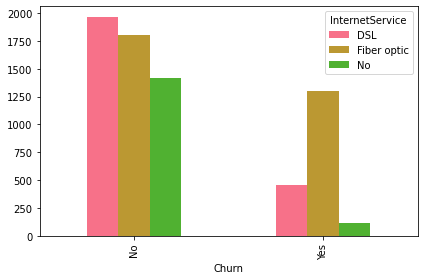

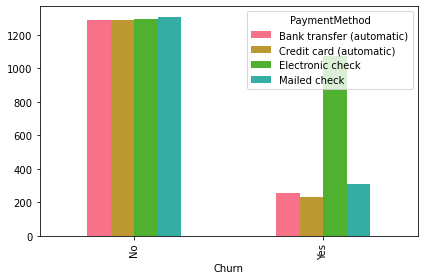

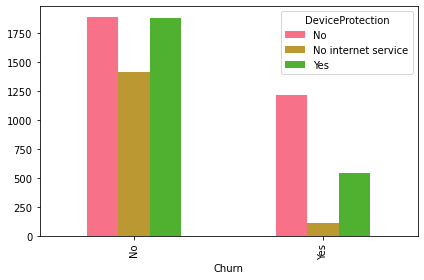

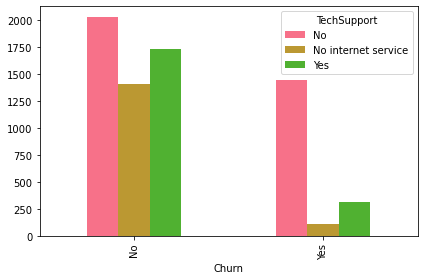

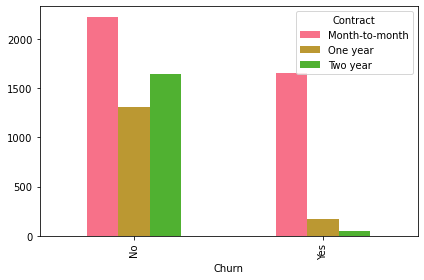

In [12]:
pd.crosstab(data['Churn'], data['InternetService']).plot(kind='bar')
plt.show()


pd.crosstab(data['Churn'], data['PaymentMethod']).plot(kind='bar')
plt.show()


pd.crosstab(data['Churn'], data['DeviceProtection']).plot(kind='bar')
plt.show()


pd.crosstab(data['Churn'], data['TechSupport']).plot(kind='bar')
plt.show()

pd.crosstab(data['Churn'], data['Contract']).plot(kind='bar')
plt.show()



C:\Users\AMAL P\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


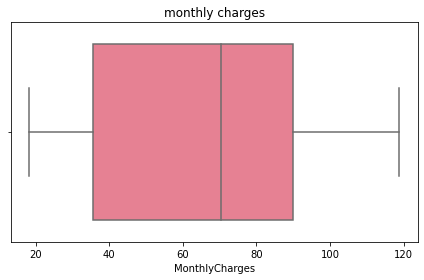

C:\Users\AMAL P\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


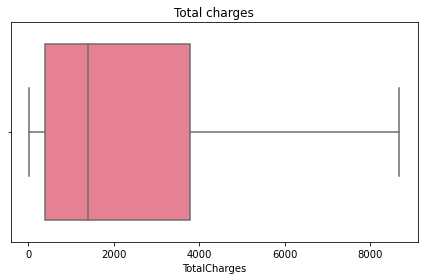

C:\Users\AMAL P\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


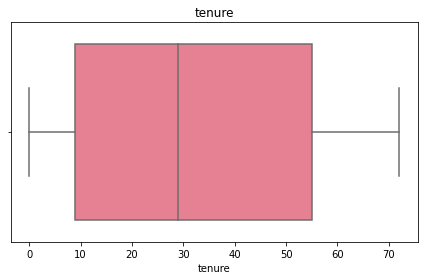

In [13]:
#to check outliers
sns.boxplot(data['MonthlyCharges'])
plt.title('monthly charges')
plt.show()

sns.boxplot(data['TotalCharges'])
plt.title('Total charges')
plt.show()

sns.boxplot(data['tenure'])
plt.title('tenure')
plt.show()

In [14]:
#no outliers

In [15]:
data_1.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102997
tenure,0.016567,1.000000,0.247900,0.826164
MonthlyCharges,0.220173,0.247900,1.000000,0.651182
TotalCharges,0.102997,0.826164,0.651182,1.000000


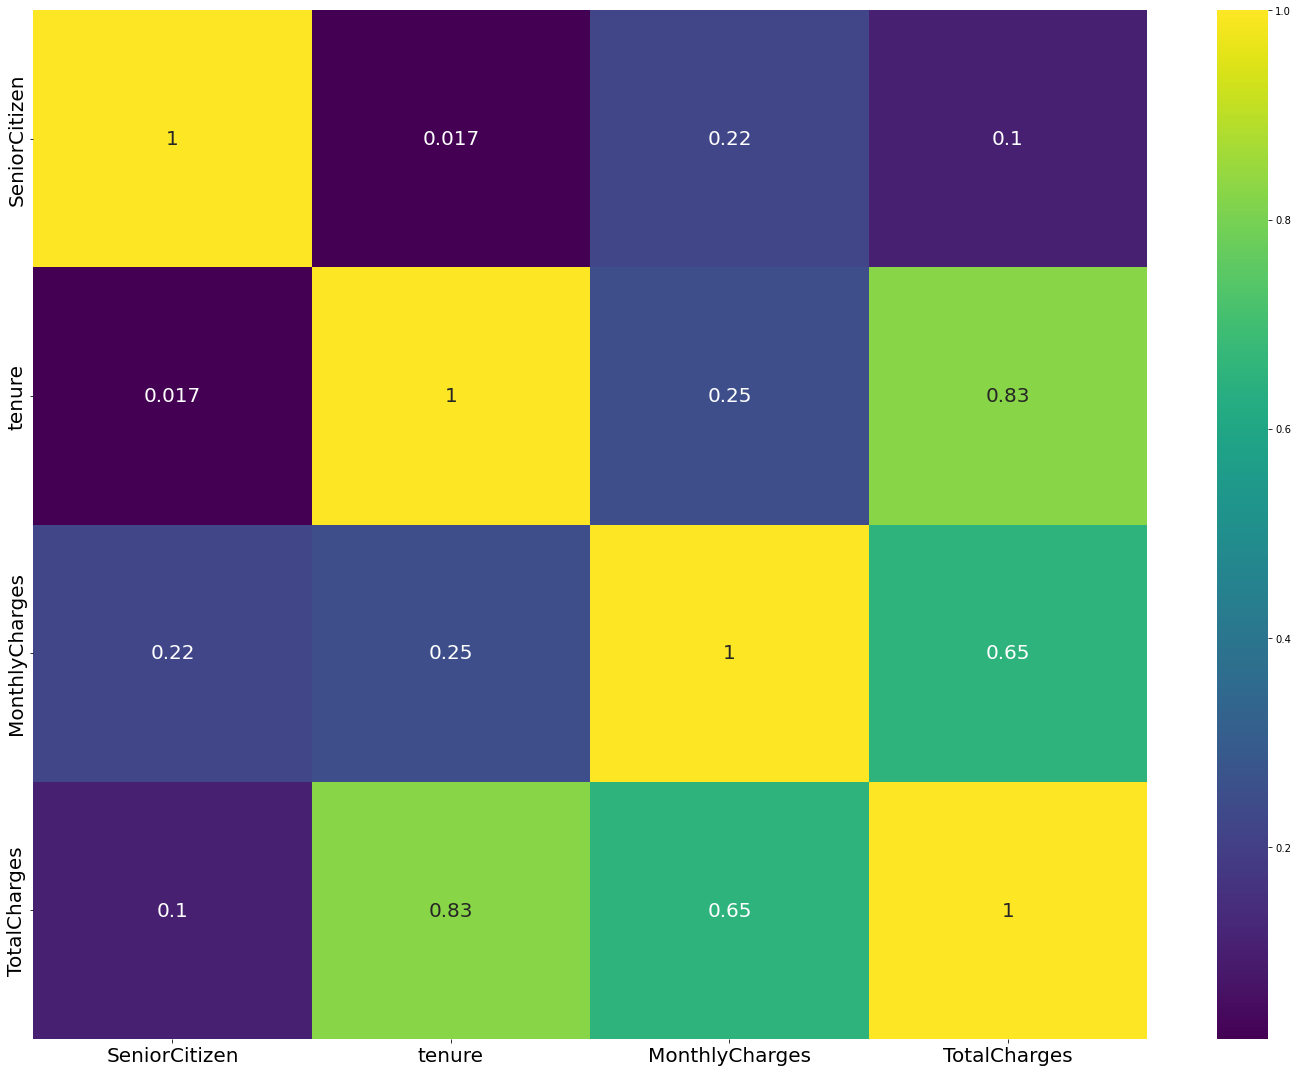

In [16]:
plt.figure(figsize=(20,15))
data_1=data_1.corr()
sns.heatmap(data_1,cmap='viridis',annot=True,annot_kws={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

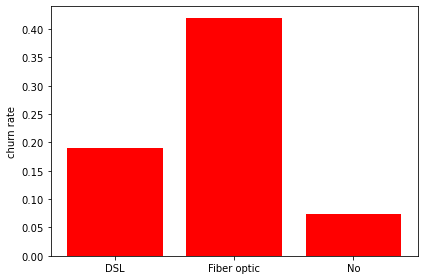

In [17]:
#visualising after encoding categorical varibles
# internet service wise chrun analysis
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Churn']=le.fit_transform(data['Churn'])
internet_churn=data.groupby(["InternetService"])["Churn"].mean().head()
plt.bar(data['InternetService'].unique(),internet_churn,color='red')
plt.ylabel('churn rate')
plt.show()




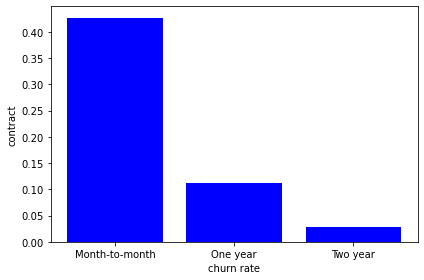

In [18]:
#contract wise churn rate
contract_churn=data.groupby(["Contract"])["Churn"].mean().head()
plt.bar(data['Contract'].unique(),contract_churn,color='blue')
plt.xlabel('churn rate')
plt.ylabel('contract')
plt.show()


In [19]:
print(data['PhoneService'].value_counts())

print(data['DeviceProtection'].value_counts())

print(data['TechSupport'].value_counts())


Yes    6361
No      682
Name: PhoneService, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


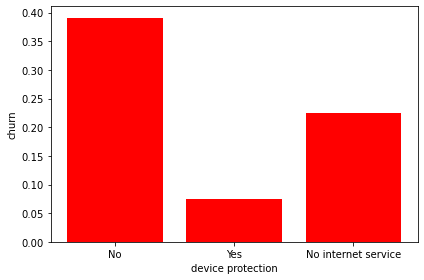

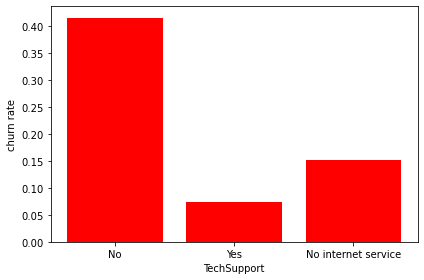

In [20]:
contract_churn=data.groupby(["DeviceProtection"])["Churn"].mean().head()
plt.bar(data['DeviceProtection'].unique(),contract_churn,color='red')
plt.xlabel('device protection')
plt.ylabel('churn')
plt.show()

TechSupport_churn=data.groupby(["TechSupport"])["Churn"].mean().head()
plt.bar(data['TechSupport'].unique(),TechSupport_churn,color='red')
plt.xlabel('TechSupport')
plt.ylabel('churn rate')
plt.show()


# 2.preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Churn']=le.fit_transform(data['Churn'])
data['gender']=le.fit_transform(data['gender'])
data['Partner']=le.fit_transform(data['Partner'])
data['Dependents']=le.fit_transform(data['Dependents'])
data['PhoneService']=le.fit_transform(data['PhoneService'])
data['MultipleLines']=le.fit_transform(data['MultipleLines'])
data['InternetService']=le.fit_transform(data['InternetService'])
data['OnlineSecurity']=le.fit_transform(data['OnlineSecurity'])
data['DeviceProtection']=le.fit_transform(data['DeviceProtection'])
data['TechSupport']=le.fit_transform(data['TechSupport'])
data['StreamingTV']=le.fit_transform(data['StreamingTV'])
data['StreamingMovies']=le.fit_transform(data['StreamingMovies'])
data['Contract']=le.fit_transform(data['Contract'])
data['PaperlessBilling']=le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod']=le.fit_transform(data['PaymentMethod'])
data['Churn']=le.fit_transform(data['Churn'])
data['OnlineBackup']=le.fit_transform(data['OnlineBackup'])

data=data.drop('customerID',axis=1)
data2=data


In [22]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [23]:


column_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[column_to_scale] = scaler.fit_transform(data[column_to_scale])
data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


In [24]:

data1=pd.get_dummies(data)
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


# model building

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

Y=data1.Churn
X=data1.drop('Churn', axis=1)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(data1, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4930, 20)
Training target vector size: (4930,)
Test feature matrix size: (2113, 20)
Test target vector size: (2113,)


In [27]:
#Finding best Random state

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8211074301940369 on Random_state 178


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=178, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)


Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8211074301940369

In [29]:
#Finding Optimal value of n_neighbors for KNN

from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5377381597422412
RMSE value for k=  2 is: 0.49845952945879374
RMSE value for k=  3 is: 0.5050619301054439
RMSE value for k=  4 is: 0.4840083465270086
RMSE value for k=  5 is: 0.4830295622158585
RMSE value for k=  6 is: 0.473130365375966
RMSE value for k=  7 is: 0.4800812362239846
RMSE value for k=  8 is: 0.4660758435139509
RMSE value for k=  9 is: 0.46301957551182027
RMSE value for k=  10 is: 0.4625082340245023
RMSE value for k=  11 is: 0.46404056809778077
RMSE value for k=  12 is: 0.4594282337214041
RMSE value for k=  13 is: 0.46709015558091754
RMSE value for k=  14 is: 0.46045718962107
RMSE value for k=  15 is: 0.46301957551182027
RMSE value for k=  16 is: 0.4583969681477008
RMSE value for k=  17 is: 0.46301957551182027
RMSE value for k=  18 is: 0.4542484939694844
RMSE value for k=  19 is: 0.45632744530684816
RMSE value for k=  20 is: 0.4505872489393898


At k=18, we get the minimum RMSE value which approximately  0.4505872489393898, and shoots up on further increasing the k value. We can safely say that k=20 will give us the best result in this case

In [30]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('Classification ML Algorithm Evaluation Matrix',m,'is' )
    print('\n')
    print('Accuracy Score :', accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix :',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('Classification Report :',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score : 0.8211074301940369


Confusion matrix : [[1410  145]
 [ 233  325]]


Classification Report :               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1555
           1       0.69      0.58      0.63       558

    accuracy                           0.82      2113
   macro avg       0.77      0.74      0.76      2113
weighted avg       0.81      0.82      0.82      2113



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score : 0.8163748225272125


Confusion matrix : [[1449  106]
 [ 282  276]]


Classification Report :               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1555
           1       0.72      0.49      0.59       558

    accuracy                           0.82      2113
   macro avg       0.78      0.71      0.73      2113
weighted avg       0.81      0.82      0.80      2